In [71]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os
import ProbabilisticParcellation.util as ut
from copy import deepcopy
import torch as pt
import nitools as nt



# Tongue vermal & lateral component (group)

## Import data from MDTB and get task-evoked responses, above motor responses

In [61]:
original_region_names = ['A1L_vermal', 'A1R_vermal', 'A1L_lateral', 'A1R_lateral']
Data_v_mdtb, regions_split = fm.load_profiles(
    file=f"NettekovenSym32_profile_group_A1split", regions=['A1L_vermal', 'A1R_vermal', 'A1L_lateral', 'A1R_lateral'])
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data_v_mdtb)
task_matrix, task_codes = fm.task_indicator(Data_v_mdtb)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data_v_mdtb[regions_split], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)

# Make dataframe
Features_Tongue = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=original_region_names)


In [17]:
# !!!! XX REMOVE AFTER SWAPPING M2 AND A1 XX !!!!
region_names_old = ['A1L_vermal', 'A1R_vermal', 'A1L_lateral', 'A1R_lateral']
region_names_new = ['M2L_vermal', 'M2R_vermal', 'M2L_lateral', 'M2R_lateral']

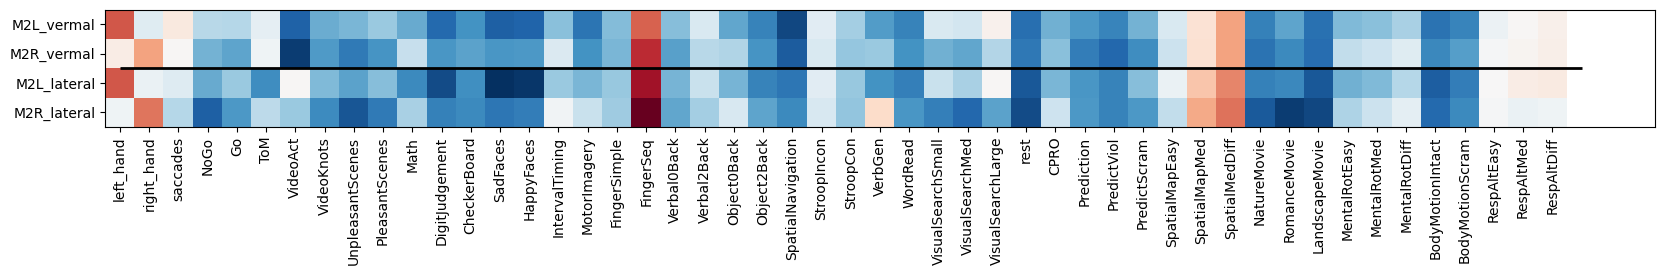

In [63]:
# Plot Tongue responses in MDTB tasks split by vermal and lateral parts (Split by group probability map)
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features_Tongue, cmap=cmap)
xlabels = Features_Tongue.columns.tolist()
ylabels = region_names_new
plt.yticks(np.arange(len(ylabels)), ylabels)
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90)
# Plot a horizontal line in the middle
plt.hlines(len(ylabels) / 2 - 0.5, 0,
           len(xlabels), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Tongue_vermal_lateral.png', dpi=300)


# Data from other datasets (Somatotopic, etc.)

In [84]:

Data_v_alldsets = pd.read_csv(ut.export_dir + 'Profiles/' +
                       'NettekovenSym32_profile_group_vermal_lateral' + '.tsv', delimiter='\t')

In [87]:
Somatotopic_v = Data_v_alldsets[Data_v_alldsets.dataset == 'Somatotopic']
# Somatotopic_v[regions_v] = normalize(Somatotopic_v[regions_v])

Pontine_v = Data_v_alldsets[Data_v_alldsets.dataset == 'Pontine']
# Pontine_v[regions_v] = normalize(Pontine_v[regions_v])

IBC_v = Data_v_alldsets[Data_v_alldsets.dataset == 'IBC']
# IBC_v[regions_v] = normalize(IBC_v[regions_v])

Nishimoto_v = Data_v_alldsets[Data_v_alldsets.dataset == 'Nishimoto']
# Nishimoto_v[regions_v] = normalize(Nishimoto_v[regions_v])

IBC_avg_v = IBC_v.groupby('condition').mean()
Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_90250/2066959893.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg_v = IBC_v.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_90250/2066959893.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()


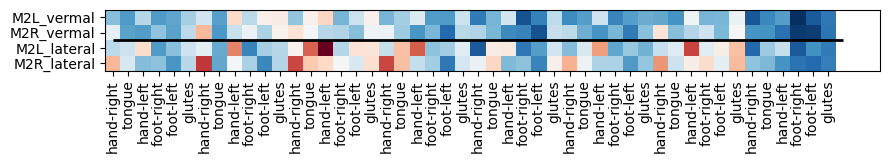

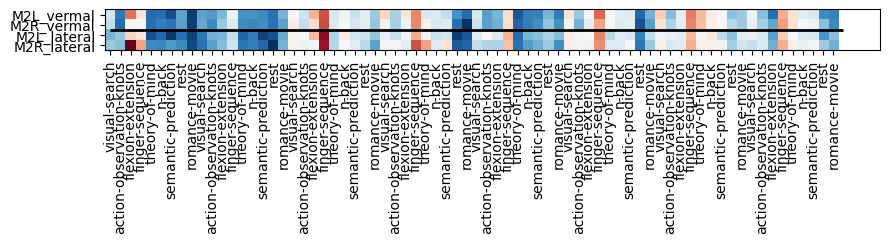

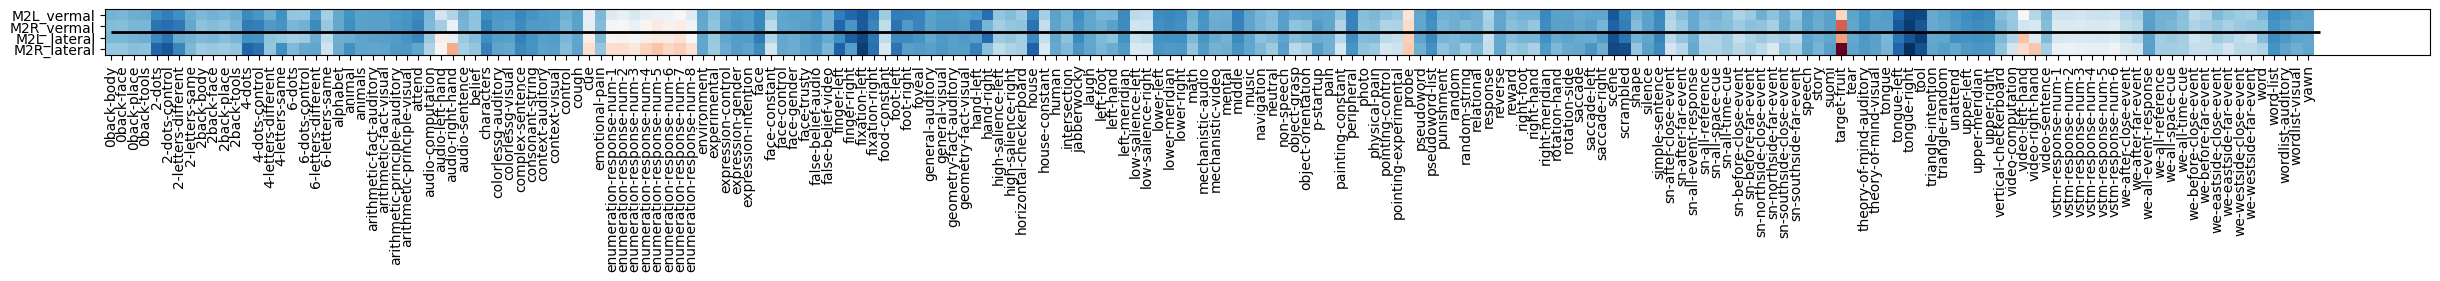

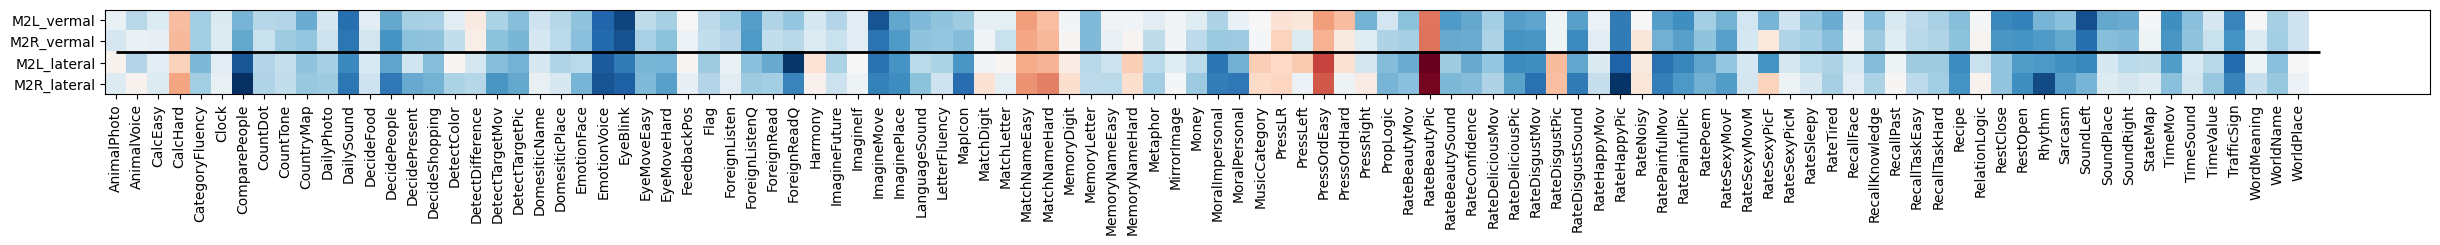

In [90]:
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_v[region_names_old].T, cmap=cmap)
xlabels = Somatotopic_v.condition.tolist()
ylabels = region_names_new
plt.yticks(np.arange(len(ylabels)), ylabels)
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90)
# Plot a horizontal line in the middle
plt.hlines(len(ylabels) / 2 - 0.5, 0,
           len(xlabels), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Somatotopic_vermal_lateral.png', dpi=300)

plt.figure(figsize=(10, 10))
plt.imshow(Pontine_v[region_names_old].T, cmap=cmap)
xlabels = Pontine_v.condition.tolist()
ylabels = region_names_new
plt.yticks(np.arange(len(ylabels)), ylabels)
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90)
# Plot a horizontal line in the middle
plt.hlines(len(ylabels) / 2 - 0.5, 0,
           len(xlabels), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Pontine_vermal_lateral.png', dpi=300)

# Plot IBC & Nishimoto
plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg_v[region_names_old].T, cmap=cmap)
xlabels = IBC_avg_v.index.tolist()
ylabels = region_names_new
plt.yticks(np.arange(len(ylabels)), ylabels)
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90)
# Plot a horizontal line in the middle
plt.hlines(len(ylabels) / 2 - 0.5, 0,
           len(xlabels), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'IBC_vermal_lateral.png', dpi=300)


plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg_v[region_names_old].T, cmap=cmap)
xlabels = Nishimoto_avg_v.index.tolist()
ylabels = region_names_new
plt.yticks(np.arange(len(ylabels)), ylabels)
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90)
# Plot a horizontal line in the middle
plt.hlines(len(ylabels) / 2 - 0.5, 0,
           len(xlabels), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Nishimoto_vermal_lateral.png', dpi=300)


# MDTB Task evoked responses with A1 split

In [215]:
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, regions = nt.read_lut(lut_dir +
                               'NettekovenSym32.lut')
regions = regions[1:]
regions_all = deepcopy(regions)
regions_all = regions_all + ['A1L_vermal',
                             'A1R_vermal', 'A1L_lateral', 'A1R_lateral']


In [216]:
Data_all_mdtb, regions_orig = fm.load_profiles(
    file=f"NettekovenSym32_profile_group_A1split", regions=regions_all)
Data_all_mdtb.head()


,condition,M1L,M2L,M3L,M4L,A1L,A2L,A3L,A4L,D1L,...,D3R,D4R,S1R,S2R,S3R,S4R,A1L_vermal,A1R_vermal,A1L_lateral,A1R_lateral
0,NoGo,-0.049697,-0.063125,-0.057115,-0.054657,-0.053771,-0.063439,-0.059222,-0.064402,-0.063051,...,-0.061950,-0.045993,-0.038379,-0.037517,-0.035938,-0.039675,-0.029890,-0.035484,-0.066050,-0.079153
1,Go,-0.013651,-0.008565,0.016004,-0.000821,0.013641,0.013373,-0.011642,-0.020983,-0.021751,...,-0.007249,-0.007990,-0.004988,-0.012350,-0.019026,-0.012943,0.010366,-0.029658,0.015822,-0.031776
2,ToM,0.001135,-0.032035,-0.011306,-0.008575,-0.012420,-0.019404,-0.010372,-0.015481,-0.008030,...,0.018891,0.037861,0.075518,0.079397,0.081598,0.072855,0.017882,0.012034,-0.029251,-0.024017
3,VideoAct,0.054209,0.087172,0.034292,0.046130,0.042844,0.051725,0.058952,0.070411,0.054409,...,0.043395,0.040911,0.047120,0.038669,0.032307,0.041079,0.007654,0.011336,0.061505,0.057199
4,VideoKnots,0.054239,0.058691,0.024966,0.040131,0.021507,0.028544,0.063137,0.080362,0.096249,...,0.042940,0.061386,0.075363,0.071057,0.060392,0.071641,0.012683,0.013964,0.026927,0.015555


In [217]:
region_names_swap_old = ['M2L', 'M2R', 'A1L', 'A1R']
region_names_swap_new = ['A1L', 'A1R', 'M2L', 'M2R']
swap_labels_full = dict(
    zip(region_names_swap_old, region_names_swap_new))
swap_index_full = [regions_orig.index(swap_labels_full.get(x, x))
                   for x in regions_orig]
Data_all_mdtb[regions_orig] = Data_all_mdtb[regions_orig].iloc[:, swap_index_full]
Data_all_mdtb.head()

,condition,M1L,M2L,M3L,M4L,A1L,A2L,A3L,A4L,D1L,...,D3R,D4R,S1R,S2R,S3R,S4R,A1L_vermal,A1R_vermal,A1L_lateral,A1R_lateral
0,NoGo,-0.049697,-0.053771,-0.057115,-0.054657,-0.063125,-0.063439,-0.059222,-0.064402,-0.063051,...,-0.061950,-0.045993,-0.038379,-0.037517,-0.035938,-0.039675,-0.029890,-0.035484,-0.066050,-0.079153
1,Go,-0.013651,0.013641,0.016004,-0.000821,-0.008565,0.013373,-0.011642,-0.020983,-0.021751,...,-0.007249,-0.007990,-0.004988,-0.012350,-0.019026,-0.012943,0.010366,-0.029658,0.015822,-0.031776
2,ToM,0.001135,-0.012420,-0.011306,-0.008575,-0.032035,-0.019404,-0.010372,-0.015481,-0.008030,...,0.018891,0.037861,0.075518,0.079397,0.081598,0.072855,0.017882,0.012034,-0.029251,-0.024017
3,VideoAct,0.054209,0.042844,0.034292,0.046130,0.087172,0.051725,0.058952,0.070411,0.054409,...,0.043395,0.040911,0.047120,0.038669,0.032307,0.041079,0.007654,0.011336,0.061505,0.057199
4,VideoKnots,0.054239,0.021507,0.024966,0.040131,0.058691,0.028544,0.063137,0.080362,0.096249,...,0.042940,0.061386,0.075363,0.071057,0.060392,0.071641,0.012683,0.013964,0.026927,0.015555


In [218]:
# Drop the old M2L and M2R
Data_all_mdtb = Data_all_mdtb.drop(columns=['M2L'])
Data_all_mdtb = Data_all_mdtb.drop(columns=['M2R'])
# Rename A1L_vermal to M2L_vermal and A1R_vermal to M2R_vermal
regions_vl_old = ['A1L_vermal', 'A1L_lateral', 'A1R_vermal', 'A1R_lateral']
regions_vl_new = ['M2L_vermal', 'M2L_lateral', 'M2R_vermal', 'M2R_lateral']
swap_labels_vl = dict(zip(regions_vl_old, regions_vl_new))
Data_all_mdtb = Data_all_mdtb.rename(
    columns=swap_labels_vl)
regions_new = Data_all_mdtb.columns.tolist()
regions_new.remove('condition')


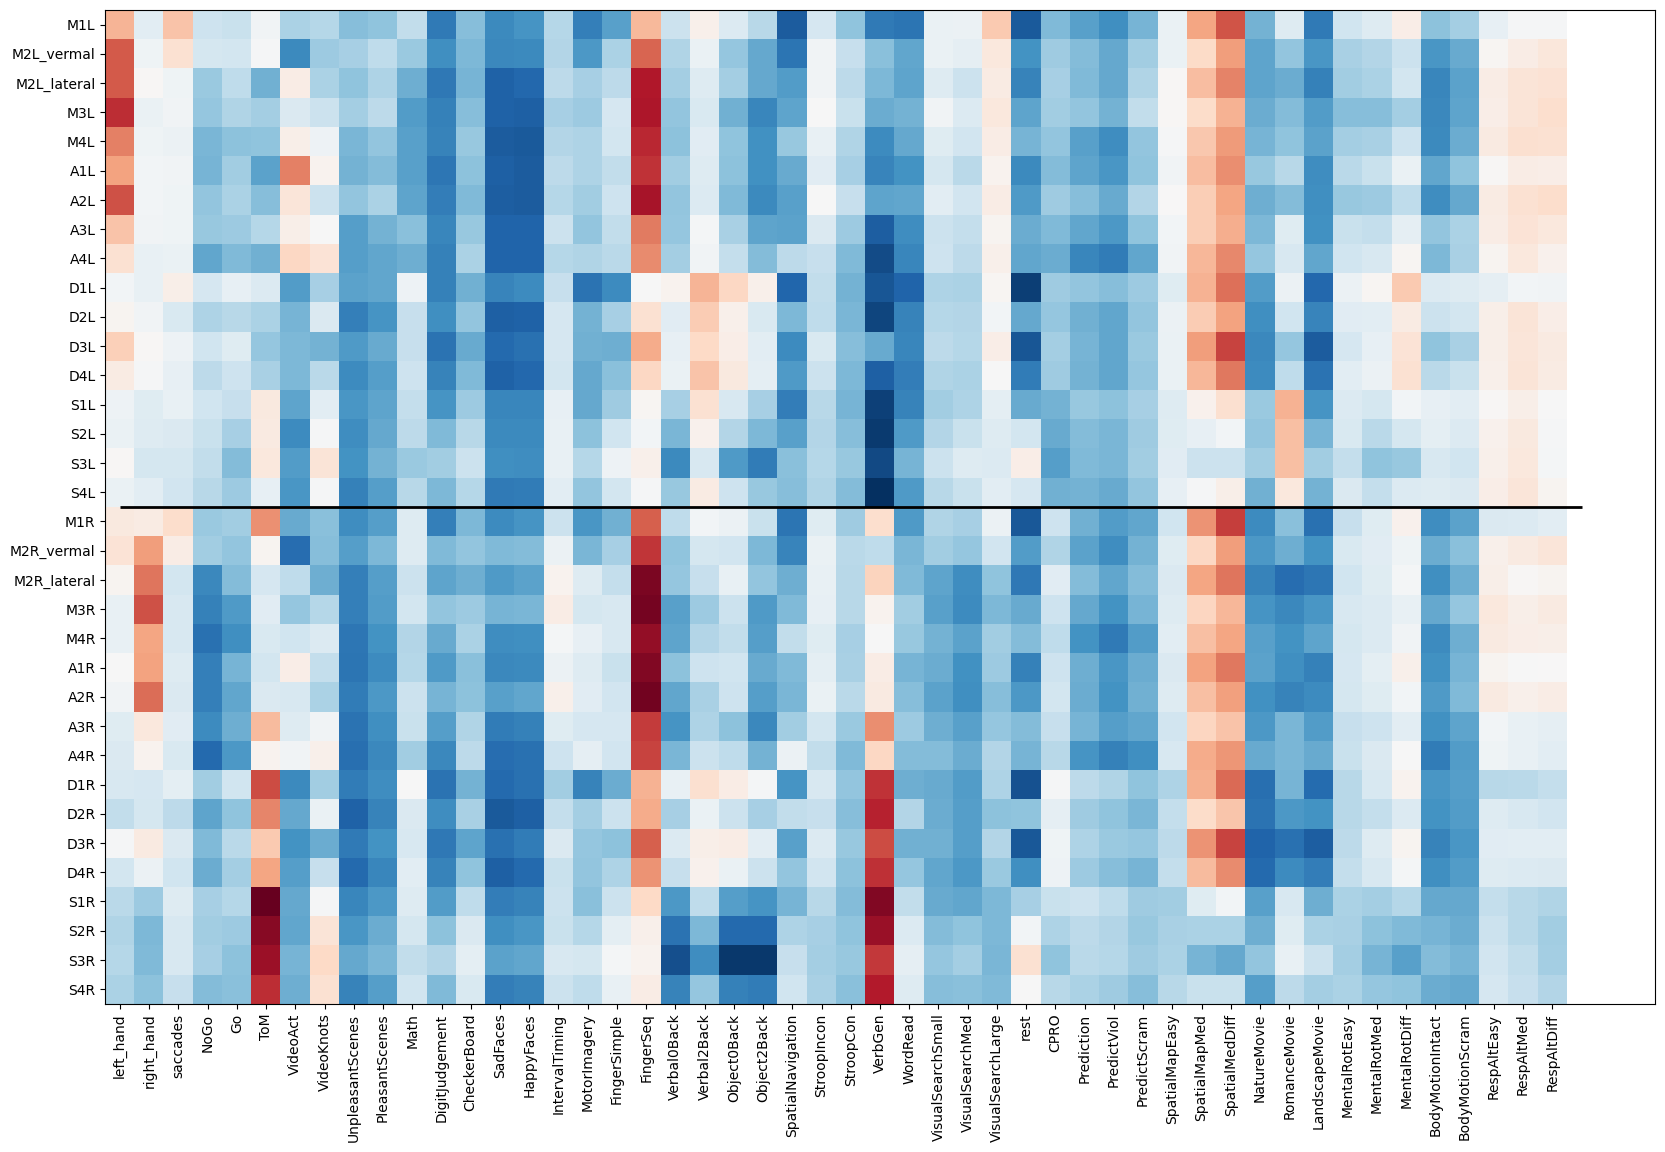

In [219]:


tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data_all_mdtb)
task_matrix, task_codes = fm.task_indicator(Data_all_mdtb)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm_all, tags_norm = fm.normalize(Data_all_mdtb[regions_new], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm_all.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions_new)

# Reorder columns
regions_ordered = ['M1L', 'M2L_vermal', 'M2L_lateral', 'M3L', 'M4L', 'A1L', 'A2L', 'A3L', 'A4L', 'D1L', 'D2L', 'D3L', 'D4L', 'S1L', 'S2L', 'S3L',
                'S4L', 'M1R', 'M2R_vermal', 'M2R_lateral', 'M3R', 'M4R', 'A1R', 'A2R', 'A3R', 'A4R', 'D1R', 'D2R', 'D3R', 'D4R', 'S1R', 'S2R', 'S3R', 'S4R']
Features = Features.reindex(regions_ordered)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
ylabels = regions_ordered
xlabels = Features.columns.tolist()
plt.yticks(np.arange(len(ylabels)), ylabels)
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90)
# Plot a horizontal line in the middle
plt.hlines(len(ylabels) / 2 - 0.5, 0,
              len(xlabels), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Features_vermal_lateral.png', dpi=300)


In [235]:
# Melt
T = Features.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                                       var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[2]
T['reg'] = T.region
T['domains'] = T.reg.str[0]

In [227]:
T[T['domains'] == 'M']

,index,task,score,region,side,reg,domains
0,M1L,left_hand,0.160571,M1L,L,M1,M
1,M2L_vermal,left_hand,0.231479,M2L_vermal,L,M2,M
2,M2L_lateral,left_hand,0.231633,M2L_lateral,L,M2,M
3,M3L,left_hand,0.263815,M3L,L,M3,M
4,M4L,left_hand,0.202941,M4L,L,M4,M
...,...,...,...,...,...,...,...
1683,M1R,RespAltDiff,0.046639,M1R,R,M1,M
1684,M2R_vermal,RespAltDiff,0.104602,M2R_vermal,R,M2,M
1685,M2R_lateral,RespAltDiff,0.081311,M2R_lateral,R,M2,M
1686,M3R,RespAltDiff,0.096108,M3R,R,M3,M


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:177: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:178: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


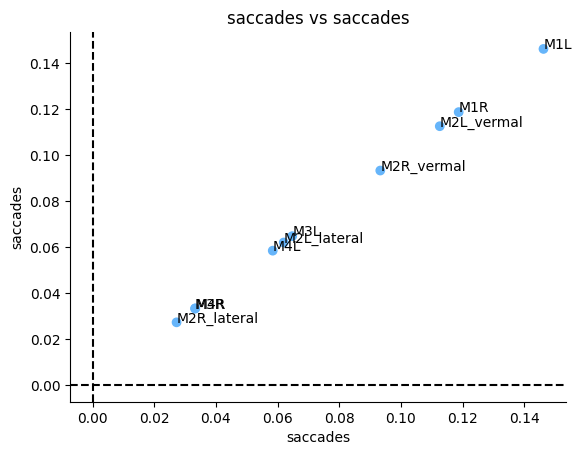

In [242]:
compare = ['VerbGen', 'saccades']
fm.scatter_plot_tasks(
    compare, T[T['domains'] == 'M'], ignore_side=False, color='domains')
# Remove box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
